**1 Implement Linear Regression Model Using US Housing Data**

Part 1 – Import the required Python, Pandas, Matplotlib, Seaborn packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
train=pd.read_csv("/content/sample_data/california_housing_test.csv")

In [4]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [5]:
print(train.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


In [6]:
print(train.describe(percentiles=[0.25, 0.5, 0.75, 0.9]))


         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000           37.000000   3129.000000   
90%    -117.269000    38.48000           46.000000   4535.300000   
max    -114.490000    41.92000           52.000000  30450.000000   

       total_bedrooms    population  households  median_income  \
count     3000.000000   3000.000000  3000.00000    3000.000000   
mean       529.950667   1402.798667   489.91200       3.807272   
std        415.654368   1030.543012   365.42271       1.854512   
min          2.000000      5.000000     2.00000       0

In [7]:
print(train.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [8]:
column=list(train.columns)
len=len(column)
column

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

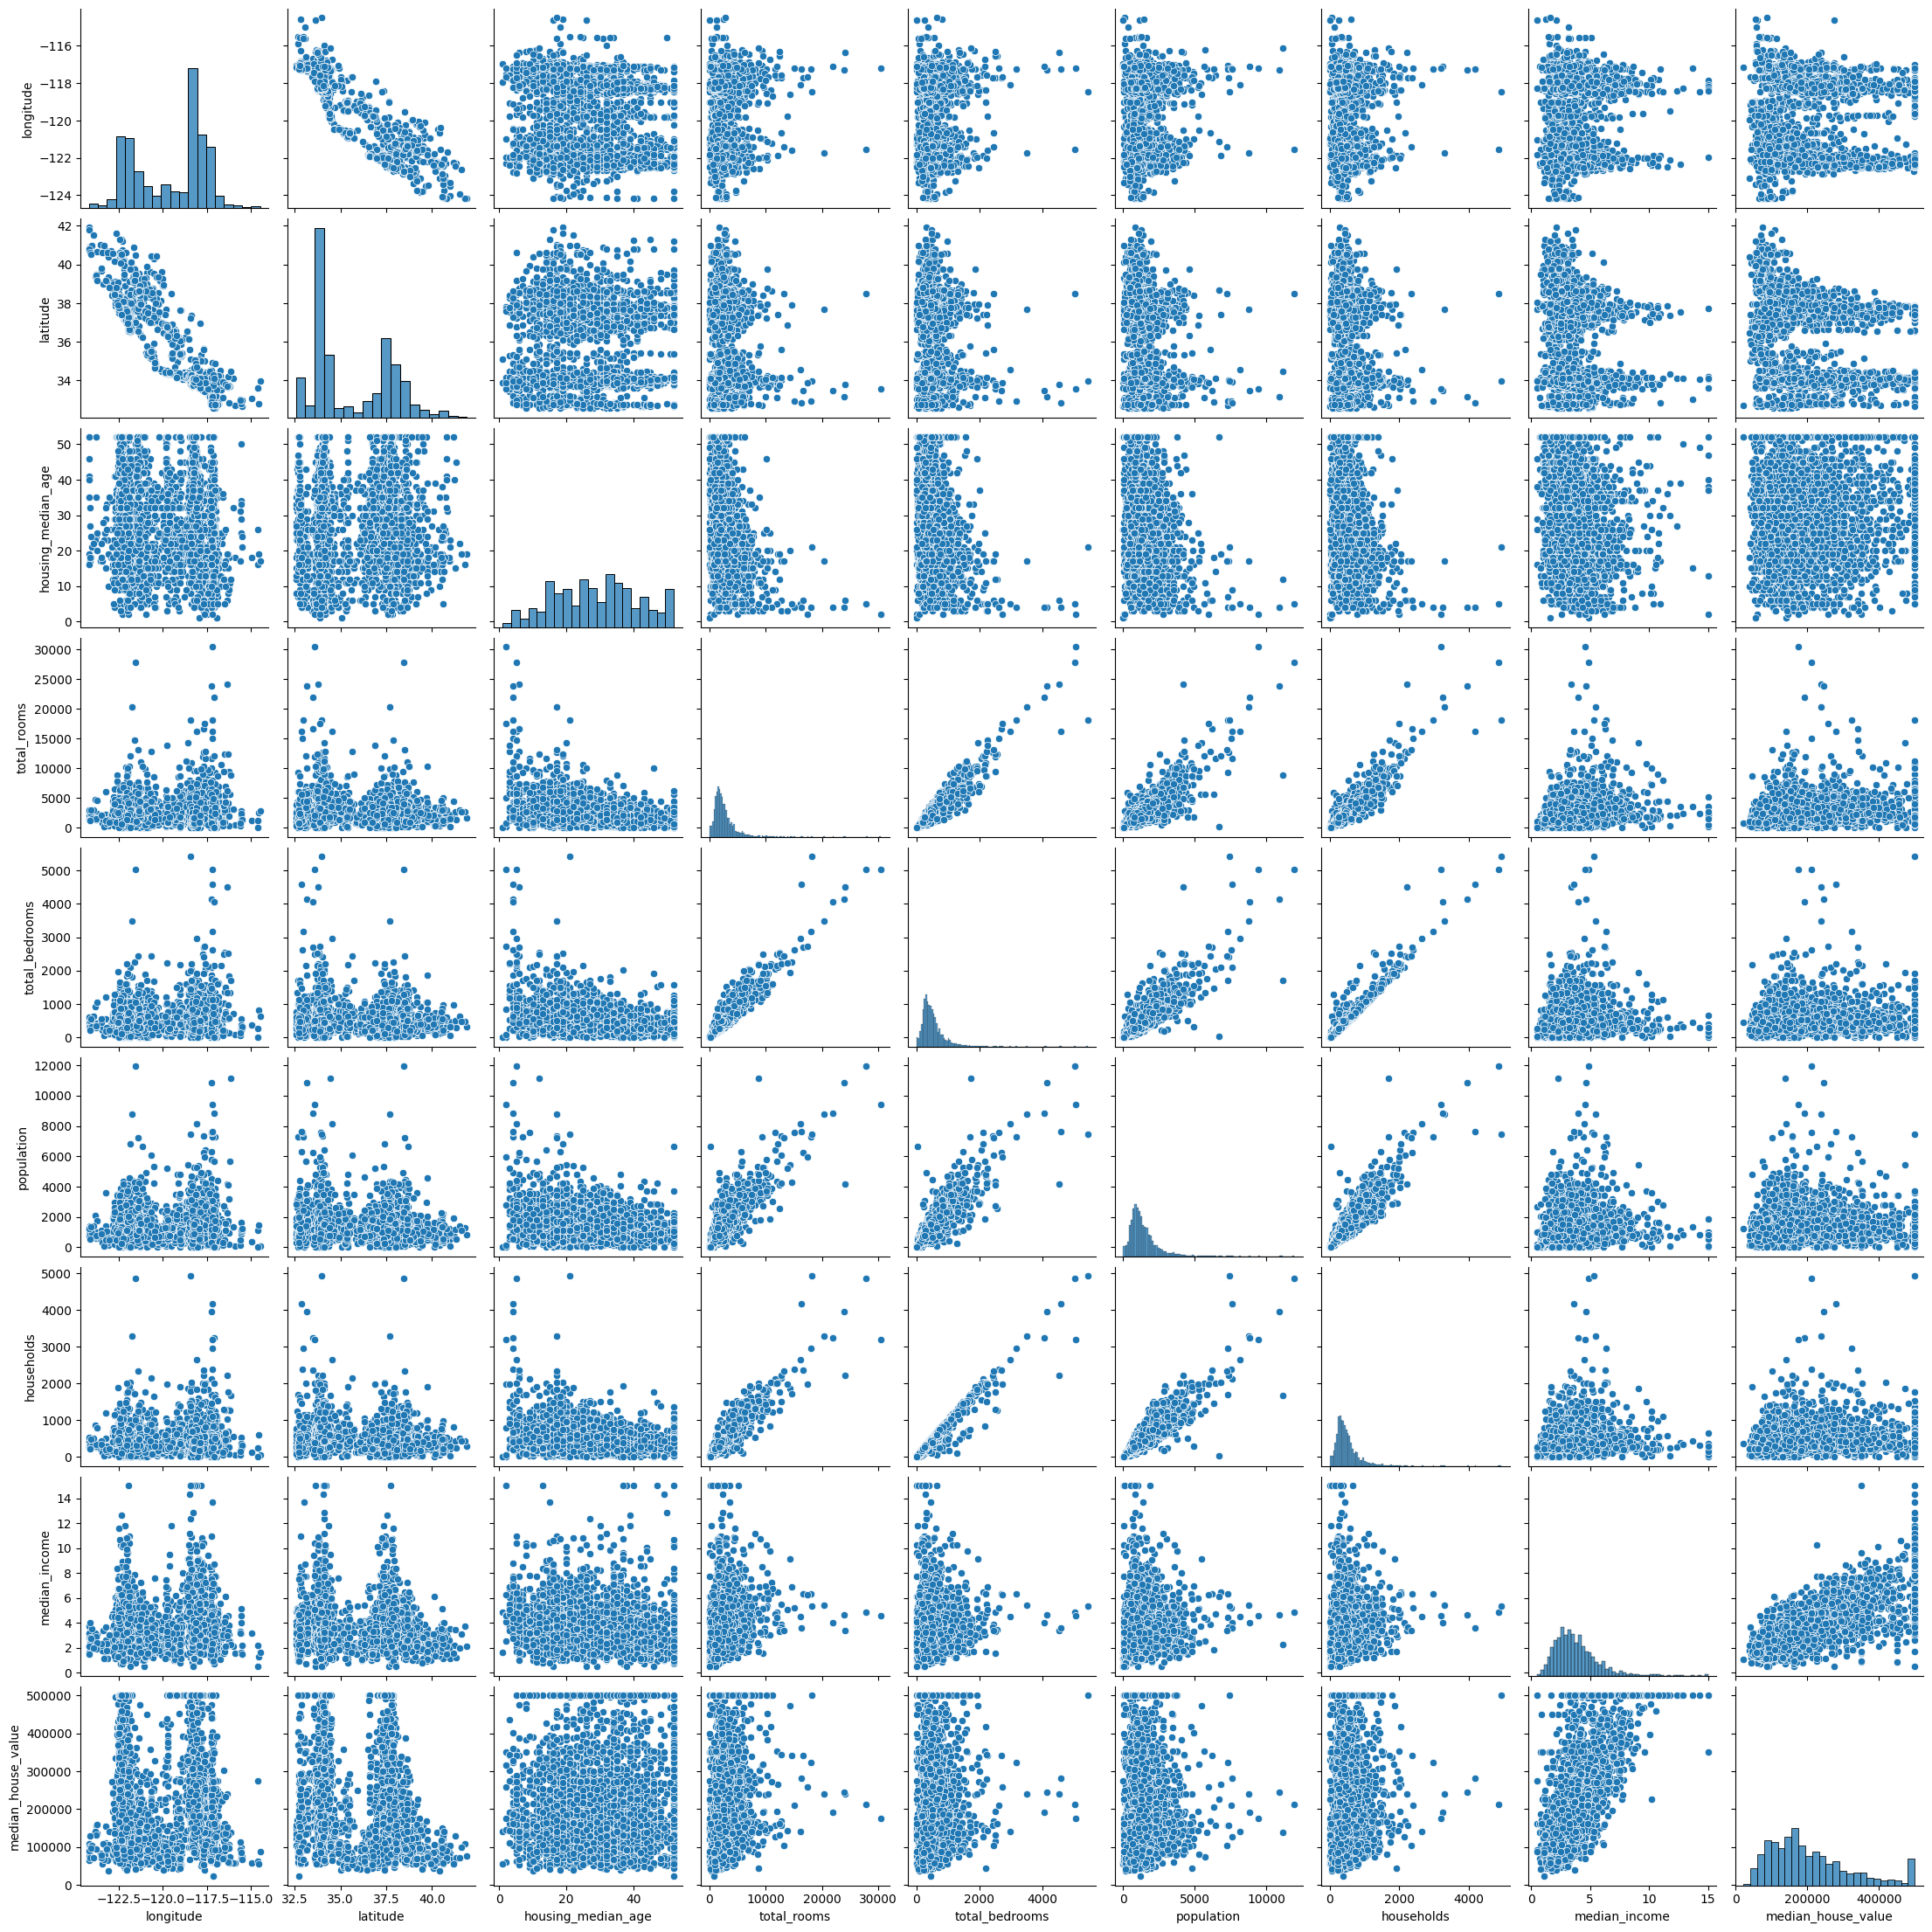

In [9]:
sns.pairplot(train)
plt.show()

In [10]:
train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


<Axes: >

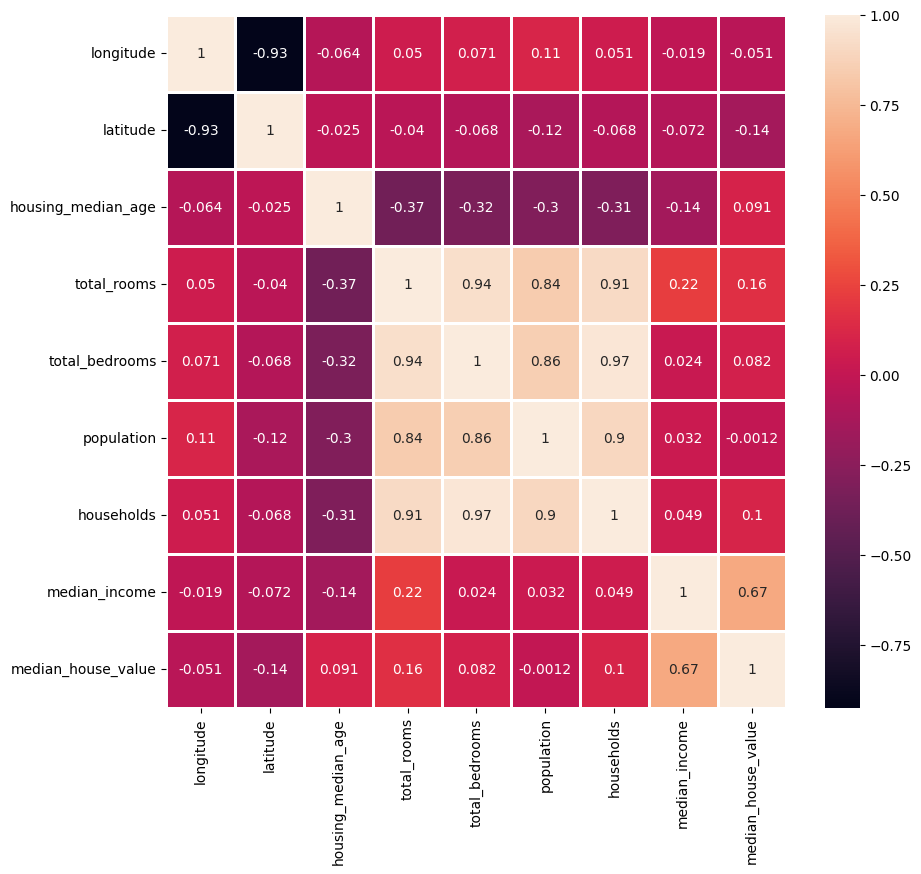

In [11]:
plt.figure(figsize=(10,9))
sns.heatmap(train.corr(),annot=True,linewidths=2)

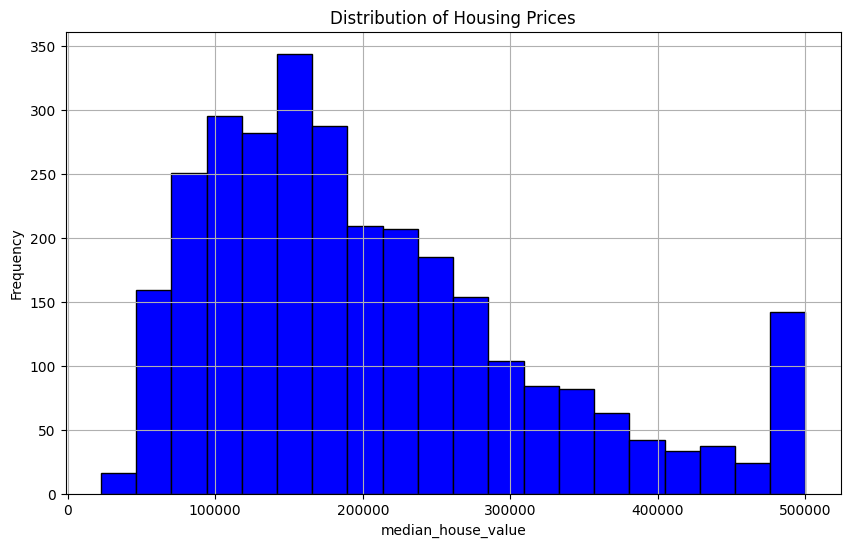

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(train['median_house_value'], bins=20, color=['b'], edgecolor='black')
plt.title('Distribution of Housing Prices')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

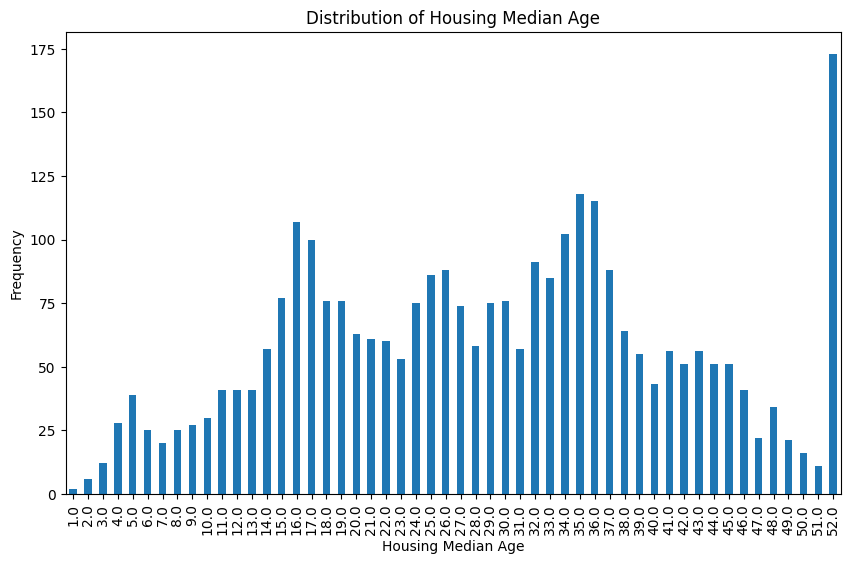

In [13]:
plt.figure(figsize=(10, 6))
train['housing_median_age'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()


In [14]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [15]:
X = train.drop('median_house_value', axis=1)
Y = train['median_house_value']

In [16]:
Y.head()

0    344700.0
1    176500.0
2    270500.0
3    330000.0
4     81700.0
Name: median_house_value, dtype: float64

**Part 2 – Model training and Fit the data to Model**

In [17]:
#Split the data generated from list created as X, Y is distributed using train test split function as X train, Y train, X test, Y test
from sklearn.model_selection import train_test_split

In [18]:
17000*0.8

13600.0

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3, random_state=123)

In [20]:
Y_test.shape

(900,)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [22]:
lm=LinearRegression()

In [23]:
#Fit the data to the Linear Model using fit
lm.fit(X_train,Y_train)

LinearRegression()

In [28]:
#dat info of linear model
print("the intercept term of the linear model: ",lm.intercept_)
print("the coefficent term of the linear model: ",lm.coef_)

the intercept term of the linear model:  -3468431.409385577
the coefficent term of the linear model:  [-4.12628824e+04 -4.07635819e+04  1.19881409e+03 -8.97879675e+00
  1.02636340e+02 -4.04647064e+01  7.08244696e+01  3.93934013e+04]


In [50]:
#Check the intercepts and slope for the data and compute the cumulative distribution
function(cdf)
cdf=pd.DataFrame(data=lm.coef_,index=X_train.columns,
                 columns=["Coefficients"])
cdf

,Coefficients
longitude,-41262.882399
latitude,-40763.581896
housing_median_age,1198.814092
total_rooms,-8.978797
total_bedrooms,102.636340
population,-40.464706
households,70.824470
median_income,39393.401274


**Part 3 – Model Evaluation Metrics**

In [55]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN=n-k
train_pred=lm.predict(X_train)
train_error=np.square(train_pred-Y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0,0,0,0]
for i in range(k):
  r=(sum_error/dfN)
  r=r/np.sum(np.square(X_train[
      list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
  se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-Statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-Statistic
longitude,-41262.882399,776.772511,-53.120935
latitude,-40763.581896,727.049911,-56.067102
housing_median_age,1198.814092,123.276994,9.724556
total_rooms,-8.978797,0.738872,-12.152027
total_bedrooms,102.636340,3.908610,26.259036
population,-40.464706,1.523325,-26.563403
households,70.824470,4.405051,16.078015
median_income,39393.401274,819.738519,48.056057
